In [32]:
import matplotlib.pyplot as plt
import joypy
from matplotlib import cm
import pandas as pd
import numpy as np

In [33]:
## import data 

SPFQ = pd.read_stata('../SurveyData/SPF/individual/InfExpSPFDstIndQ.dta')
SCEM = pd.read_stata('../../../InfVar-Local/workingfolder/SurveyData/SCE/InfExpSCEProbIndM.dta')

SPFQ = SPFQ[~SPFQ['year'].isna()]
SPFQ['year'] =SPFQ['year'].astype(int)

2.0813601508962165e-08
9.241055488586426
0.3333333134651184
56.33332824707031


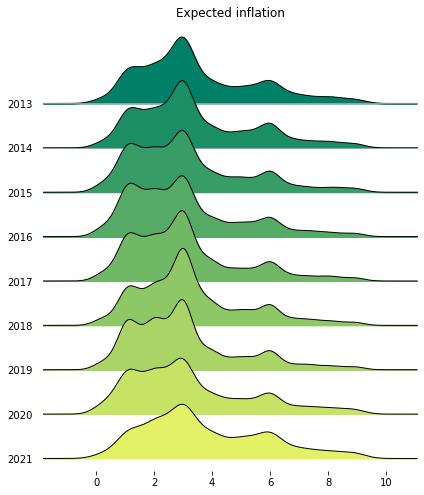

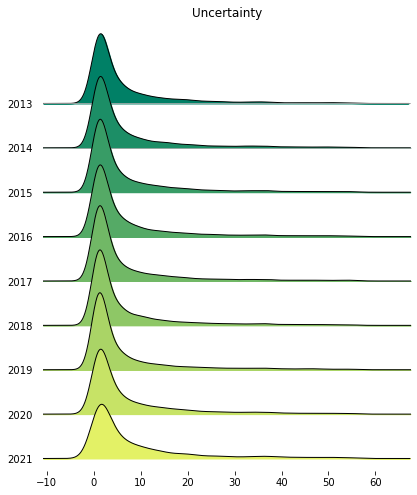

In [38]:
## SCE 
## create labels for year 
labels_SCE=[y for y in list(SCEM.year.unique())]

labels_SCE_list = ['Expected inflation',
              'Uncertainty']

mom_SCE_list = ['Q9_mean',
           'Q9_var']

## plot the cross-sectional over time 

for mom_id,mom in enumerate(mom_SCE_list):
    ## exclude outliers 
    mom_nonan = SCEM[~SCEM[mom].isna()]
    mom_lb, mom_ub = np.percentile(mom_nonan[mom],5),np.percentile(mom_nonan[mom],95) ## exclude top and bottom 3% observations
    print(mom_lb)
    print(mom_ub)
    to_keep = ((mom_nonan[mom] < mom_ub) & (mom_nonan[mom] > mom_lb))
    mom_nonan = mom_nonan[to_keep]

    fig, axes = joypy.joyplot(mom_nonan, 
                              by="year", 
                              column= mom, 
                              labels=labels_SCE, 
                              kind="kde", 
                              range_style='own', 
                              grid="y", 
                              linewidth=1, 
                              legend=False, 
                              figsize=(6,7),
                              title=labels_SCE_list[mom_id],
                              colormap=cm.summer
                             )
    plt.savefig('../graphs/ind/joy_'+str(mom)+'.jpg')

0.5007420563747529
3.249835147921501
0.027747933524242985
1.6896522919697956
0.6007270420248475
3.0940110273715855
0.027848068881928822
1.2113309861570885


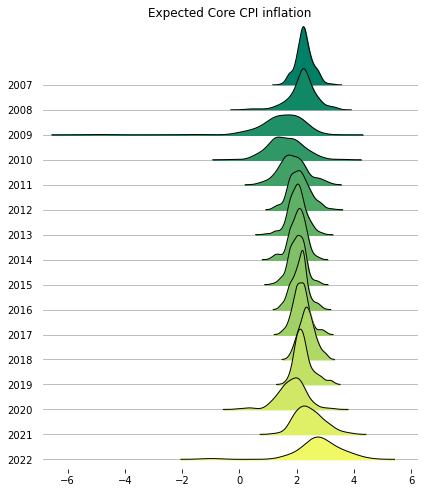

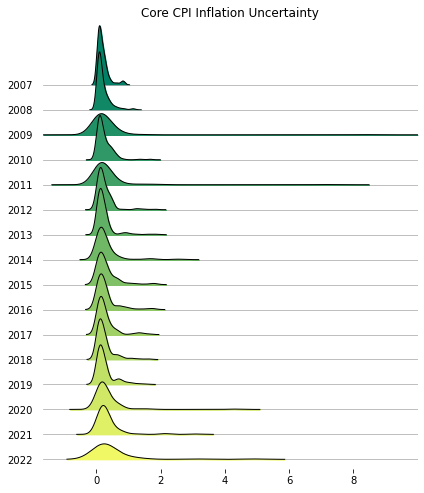

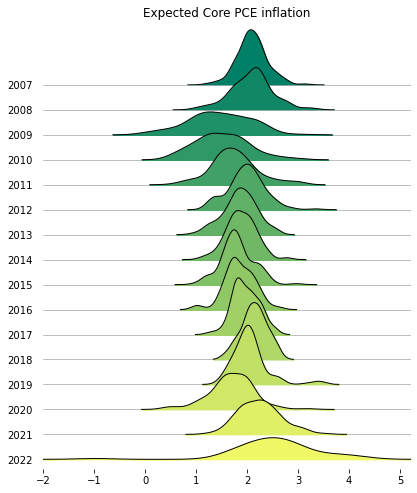

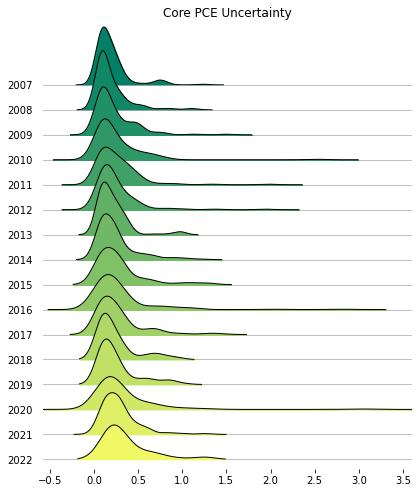

In [42]:
## SPF

labels_SPF =[y for y in list(SPFQ.year.unique())] 


labels_SPF_list = ['Expected Core CPI inflation',
                   'Core CPI Inflation Uncertainty',
                  'Expected Core PCE inflation',
                   'Core PCE Uncertainty',
                  ]

mom_SPF_list = ['PRCCPIMean1',
                'PRCCPIVar1',
               'PRCPCEMean1',
                'PRCPCEVar1']

## plot the cross-sectional over time 

for mom_id,mom in enumerate(mom_SPF_list):
    ## exclude outliers 
    mom_nonan = SPFQ[~SPFQ[mom].isna()]
    mom_lb, mom_ub = np.percentile(mom_nonan[mom],1),np.percentile(mom_nonan[mom],99) ## exclude top and bottom 3% observations
    print(mom_lb)
    print(mom_ub)
    to_keep = ((mom_nonan[mom] < mom_ub) & (mom_nonan[mom] > mom_lb))
    mom_nonan = mom_nonan[to_keep]
    fig, axes = joypy.joyplot(SPFQ, 
                              by="year", 
                              column= mom, 
                              labels=labels_SPF, 
                              kind="kde", 
                              range_style='own', 
                              grid="y", 
                              linewidth=1, 
                              legend=False, 
                              figsize=(6,7),
                              title=labels_SPF_list[mom_id],
                              colormap=cm.summer
                             )
    plt.savefig('../graphs/ind/joy_'+str(mom)+'.jpg')